# Examples

In [1]:
import chartify

Loading BokehJS ...

# Blank charts


    import chartify

    # Blank charts tell you how to fill in the labels
    ch = chartify.Chart()
    ch.show('png')



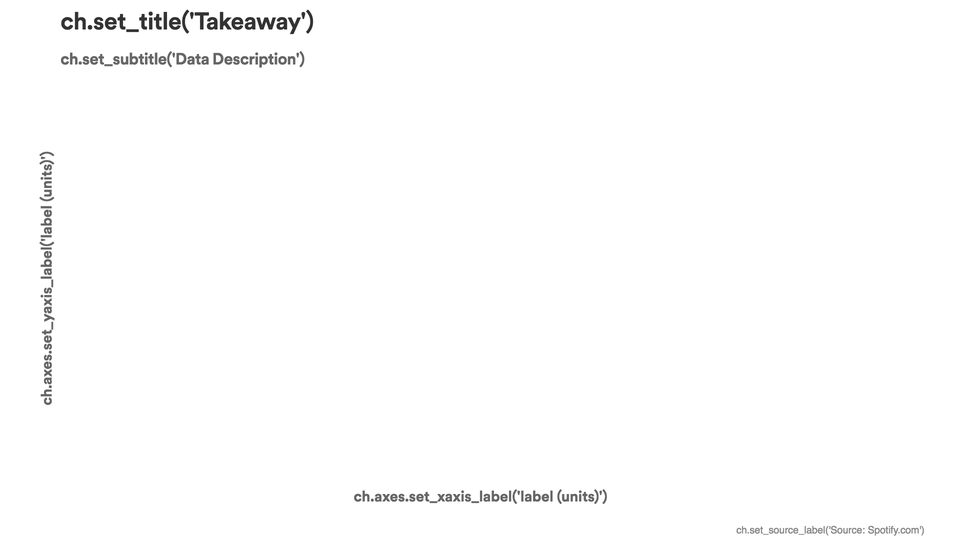

In [2]:
chartify.examples.chart_blank()

# Example data

In [3]:
chartify.examples.example_data().head(10)

date country   fruit  unit_price  quantity  total_price
0 2017-10-21      US  Banana    0.303711         4     1.214846
1 2017-05-30      JP  Banana    0.254109         4     1.016436
2 2017-05-21      CA  Banana    0.268635         4     1.074539
3 2017-09-18      BR   Grape    2.215277         2     4.430554
4 2017-12-08      US  Banana    0.308337         5     1.541687
5 2017-06-05      GB   Apple    0.870118         2     1.740235
6 2017-09-05      JP  Banana    0.279179         7     1.954252
7 2017-08-27      CA   Apple    1.025265         4     4.101059
8 2017-09-14      CA   Apple    1.078831         4     4.315324
9 2017-05-26      GB   Grape    1.840909         2     3.681818

# Both Numerical Axes

## Scatter

Scatter plot.

        Arguments:
            data_frame (pandas.DataFrame): Data source for the plot.
            x_column (str): Column name to plot on the x axis.
            y_column (str): Column name to plot on the y axis.
            size_column (str, optional): Column name of numerical values to plot
                on the size dimension.
            color_column (str, optional): Column name to group by on the color dimension.
            color_order (list, optional): List of values within the 'color_column'
                for specific sorting of the colors.
        

    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = chartify.examples.example_data()
    

    # Plot the data
    ch = chartify.Chart(blank_labels=True, x_axis_type='datetime')
    ch.plot.scatter(data, 'date', 'unit_price')
    ch.set_title("Scatterplot")
    ch.set_subtitle("Plot two numeric values.")
    ch.show('png')



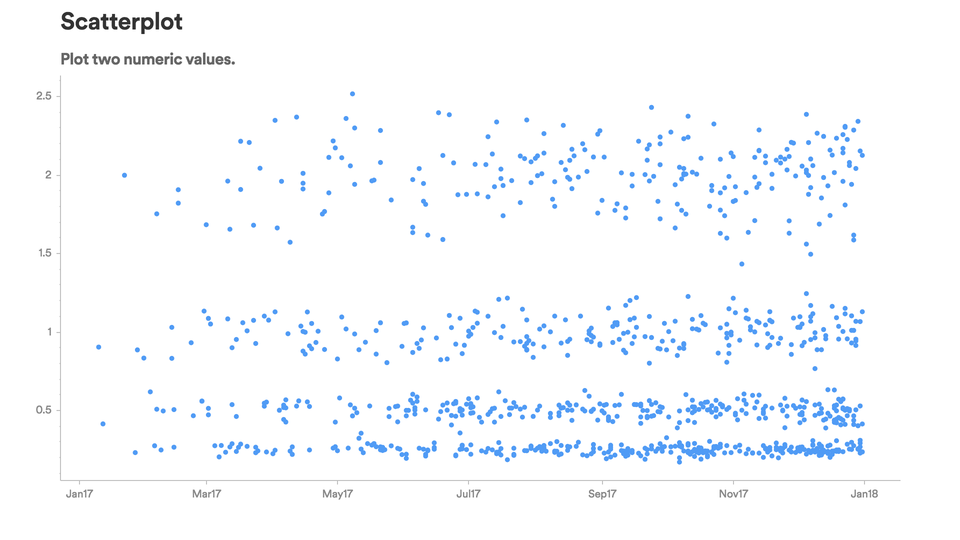


    # Plot the data
    ch = chartify.Chart(blank_labels=True, x_axis_type='datetime')
    ch.plot.scatter(data, 'date', 'unit_price', size_column='quantity')
    ch.set_title("Scatterplot")
    ch.set_subtitle("Optional 'size_column' argument for changing scatter size.")
    ch.show('png')



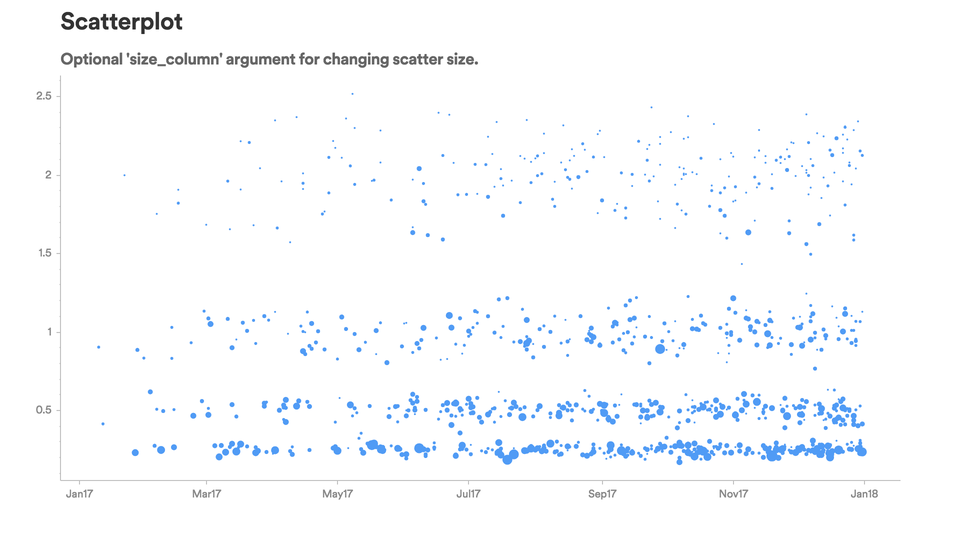


    # Plot the data
    ch = chartify.Chart(blank_labels=True, x_axis_type='datetime')
    ch.plot.scatter(data, 'date', 'unit_price', size_column='quantity', color_column='fruit')
    ch.set_title("Scatterplot")
    ch.set_subtitle("Optional 'color_column' argument for grouping by color.")
    ch.show('png')



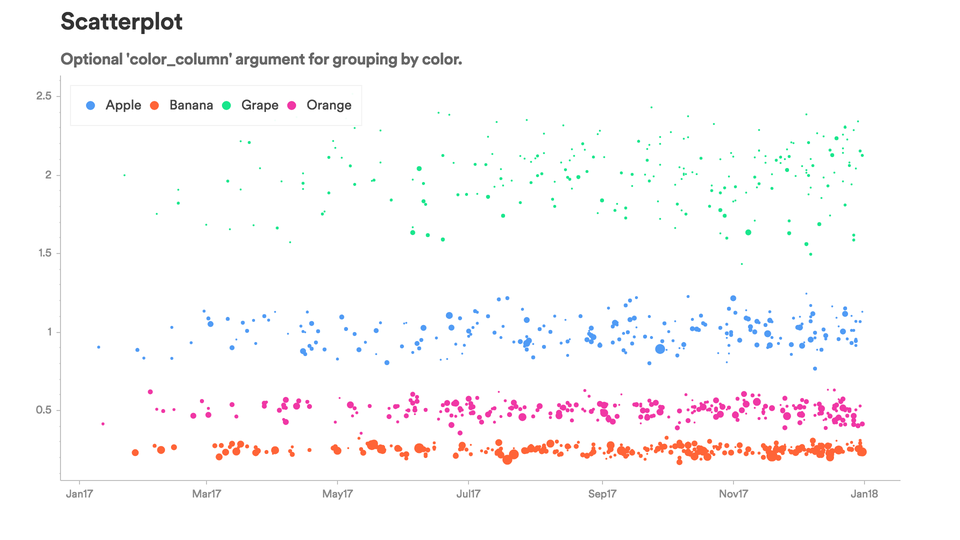

In [4]:
print(chartify.examples.plot_scatter.__doc__)
chartify.examples.plot_scatter()

## Text

Text plot.

        Arguments:
            data_frame (pandas.DataFrame): Data source for the plot.
            x_column (str): Column name to plot on the x axis.
            y_column (str): Column name to plot on the y axis.
            text_column (str): Column name to plot as text labels.
            color_column (str, optional): Column name to group by on the color dimension.
            color_order (list, optional): List of values within the 'color_column'
                for specific sorting of the colors.
            font_size (str, optional): Size of text.
            x_offset (int, optional): # of pixels for horizontal text offset.
                Can be negative. Default: 0.
            y_offset (int, optional): # of pixels for vertical text offset.
                Can be negative. Default: 0.
            angle (int): Degrees from horizontal for text rotation.
        

    import numpy as np
    import pandas as pd
    import chartify

    data = chartify.examples.example_da

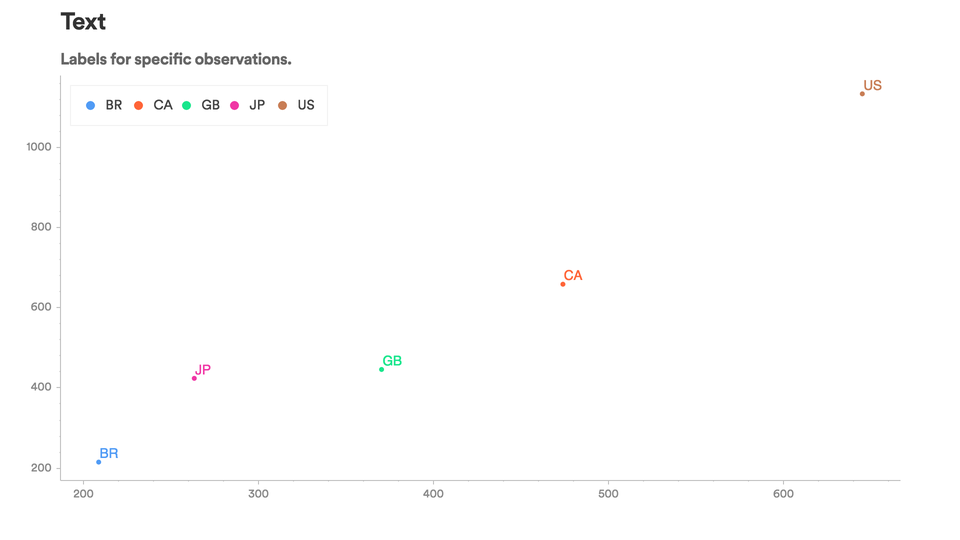

In [5]:
print(chartify.examples.plot_text.__doc__)
chartify.examples.plot_text()

## Line

Line Chart.

        Arguments:
            data_frame (pandas.DataFrame): Data source for the plot.
            x_column (str): Column name to plot on the x axis.
            y_column (str): Column name to plot on the y axis.
            color_column (str, optional): Column name to group by on the color dimension.
            color_order (list, optional): List of values within the 'color_column' for
                specific sorting of the colors.
        


    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    # Sum price grouped by date
    price_by_date = (data
                     .groupby('date')['total_price'].sum()
                     .reset_index() # Move 'date' from index to column
                     .sort_values('date')
                    )
    print(price_by_date.head())
    
        date  total_price
0 2017-01-10     1.808778
1 2017-01-12     0.829621
2 2017-01-22     1.998476
3 2

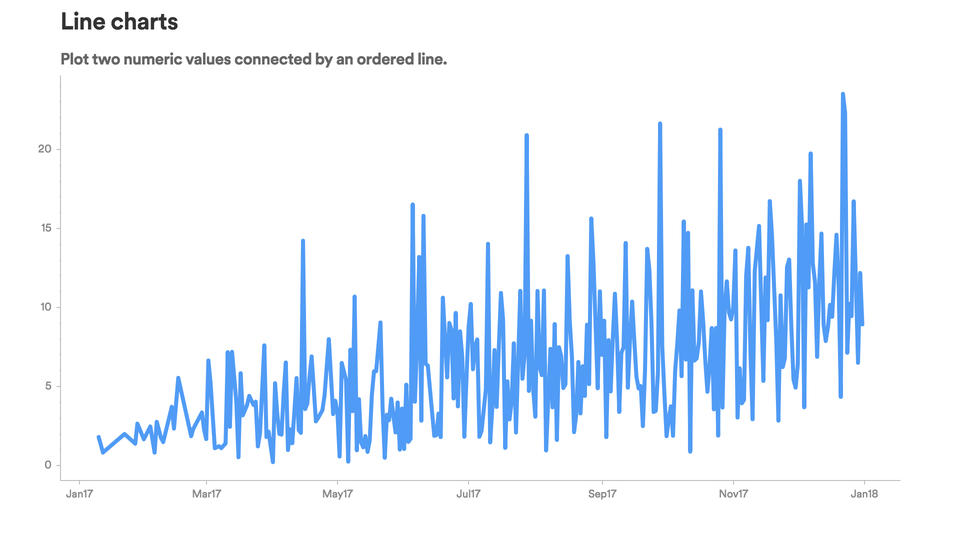


    price_by_date_and_country = (
        data.groupby(['date', 'fruit'])['total_price'].sum()
        .reset_index() # Move 'date' and 'country' from index to column
        .sort_values('date')
        )
    print(price_by_date_and_country.head())
    
        date   fruit  total_price
0 2017-01-10   Apple     1.808778
1 2017-01-12  Orange     0.829621
2 2017-01-22   Grape     1.998476
3 2017-01-27  Banana     1.390764
4 2017-01-28   Apple     2.658465

    ch = chartify.Chart(blank_labels=True, x_axis_type='datetime')
    ch.set_title("Line charts - Grouped by color")
    ch.plot.line(price_by_date_and_country, 'date', 'total_price', 'fruit')
    ch.show('png')



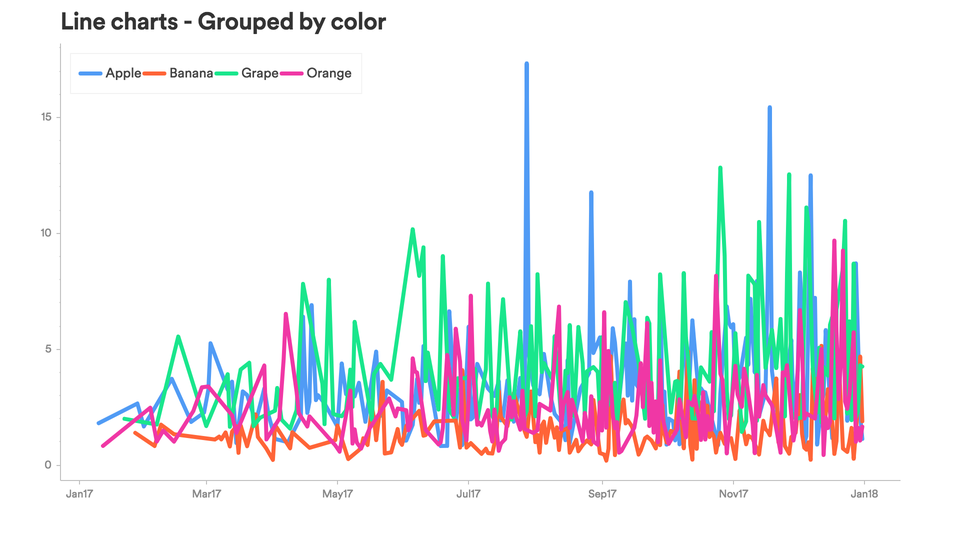

In [6]:
print(chartify.examples.plot_line.__doc__)
chartify.examples.plot_line()

# Area

Area plot.

        Note:
            - When a single y_column is passed: Shade area between the y_values and zero.
            - Use `stacked` argument for stacked areas.
            - When both y_column and second_y_column are passed:
                Shade area between the two y_columns.

        Arguments:
            data_frame (pandas.DataFrame): Data source for the plot.
            x_column (str): Column name to plot on the x axis.
            y_column (str): Column name to plot on the y axis.
            second_y_column (str, optional): Column name to plot on the y axis.
            color_column (str, optional): Column name to group by on the color dimension.
            color_order (list, optional): List of values within the 'color_column'
                for specific sorting of the colors.
            stacked (bool, optional): Stacked the areas. Only applicable with a single y_column.
                Default: False.
        

    import numpy as np
    import pandas as pd
   

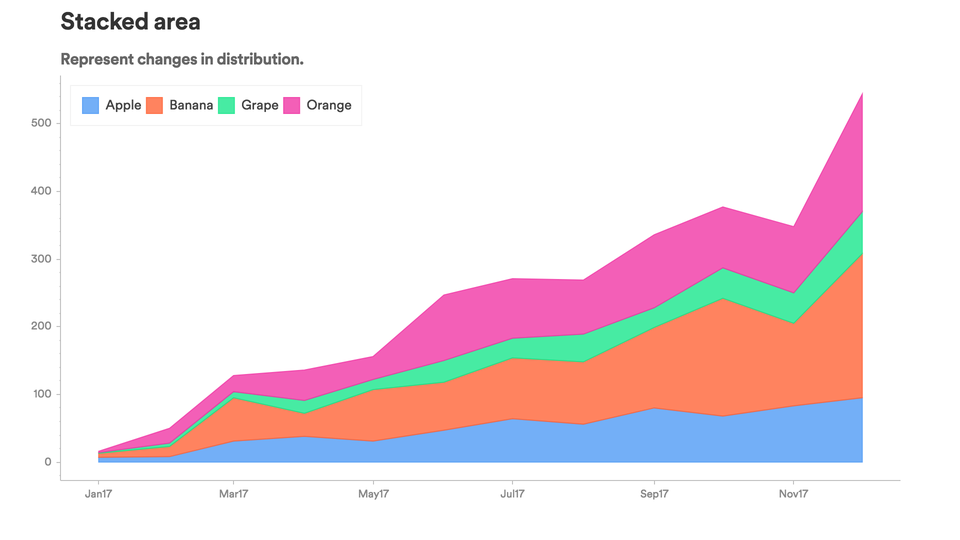


    ch = chartify.Chart(blank_labels=True, x_axis_type='datetime')
    ch.set_title("Unstacked area")
    ch.set_subtitle("Show overlapping values. Automatically adjusts opacity.")
    ch.plot.area(total_quantity_by_month_and_fruit, 'month', 'quantity', color_column='fruit', stacked=False)
    ch.show('png')



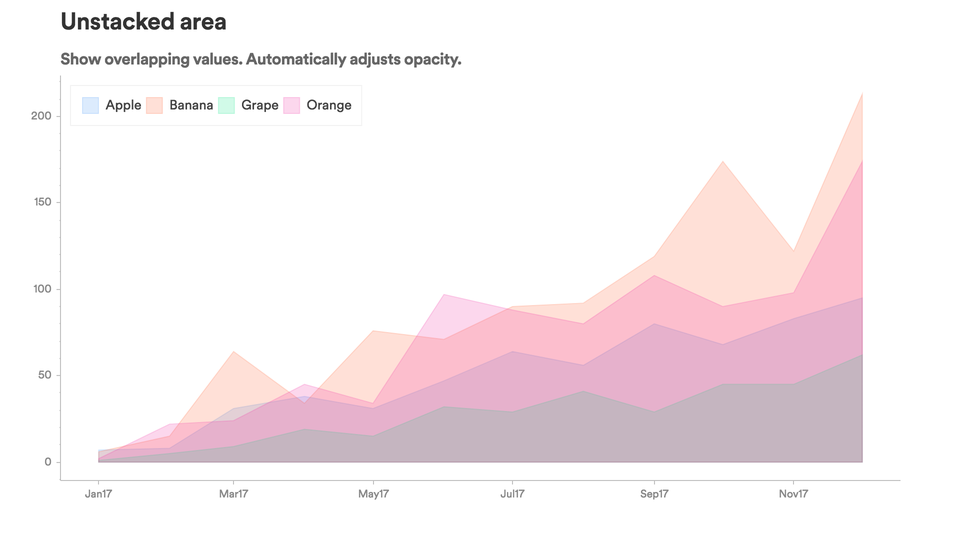



    # Sum price grouped by date
    price_by_date = (data.groupby(['date'])['total_price'].agg(['mean', 'std', 'count'])
                     .loc['2017-12-01':]
                     .assign(lower_ci=lambda x: x['mean'] - 1.96 * x['std'] / x['count'] ** .5,
                             upper_ci=lambda x: x['mean'] + 1.96 * x['std'] / x['count'] ** .5)
                     .reset_index()
                    )
    print(price_by_date.head())
    
        date      mean       std  count  lower_ci  upper_ci
0 2017-12-01  2.130242  1.723854      3  0.179518  4.080967
1 2017-12-02  1.801198  1.385051     10  0.942735  2.659662
2 2017-12-03  2.157626  1.163018      7  1.296050  3.019202
3 2017-12-04  0.923048  0.472394      4  0.460102  1.385994
4 2017-12-05  2.179000  1.258695      7  1.246546  3.111454
    
    # Plot the data
    ch = chartify.Chart(blank_labels=True, x_axis_type='datetime')
    ch.set_title("Area with second_y_column")
    ch.set_subtitle("Shade area between values. Can

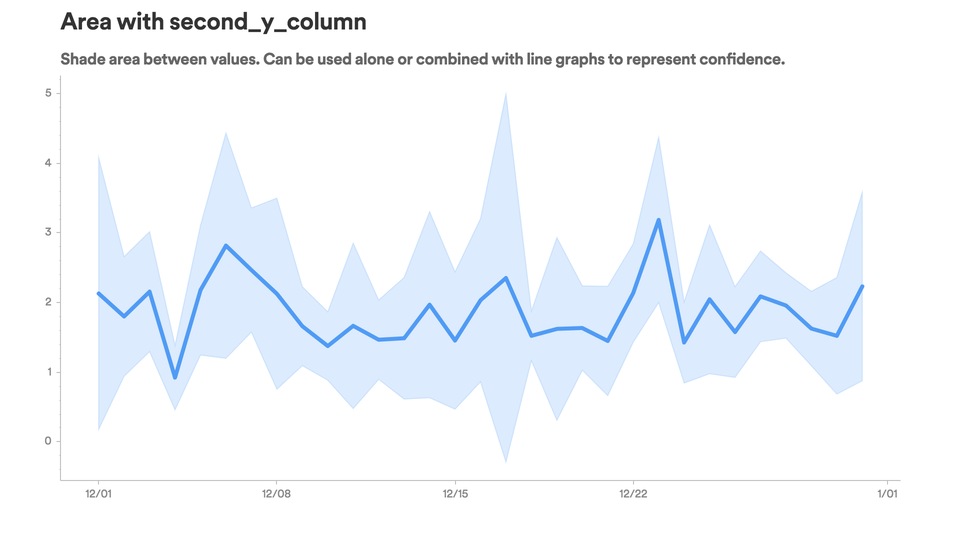

In [7]:
print(chartify.examples.plot_area.__doc__)
chartify.examples.plot_area()

# Numeric axis & Categorical Axis

## Bar plot

Bar chart.

        Note:
            To change the orientation set x_axis_type or y_axis_type
            argument of the Chart object.

        Arguments:
            data_frame (pandas.DataFrame): Data source for the plot.
            categorical_columns (str or list): Column name to plot on the categorical axis.
            numeric_column (str): Column name to plot on the numerical axis.
            color_column (str, optional): Column name to group by on the color dimension.
            color_order (list, optional): List of values within the 'color_column'
                for specific color sort.
            categorical_order_by (str or array-like, optional):
                Dimension for ordering the categorical axis. Default 'values'.
                - 'values': Order categorical axis by the numerical axis values. Default.
                - 'labels': Order categorical axis by the categorical labels.
                - array-like object (list, tuple, np.array): New labels
        

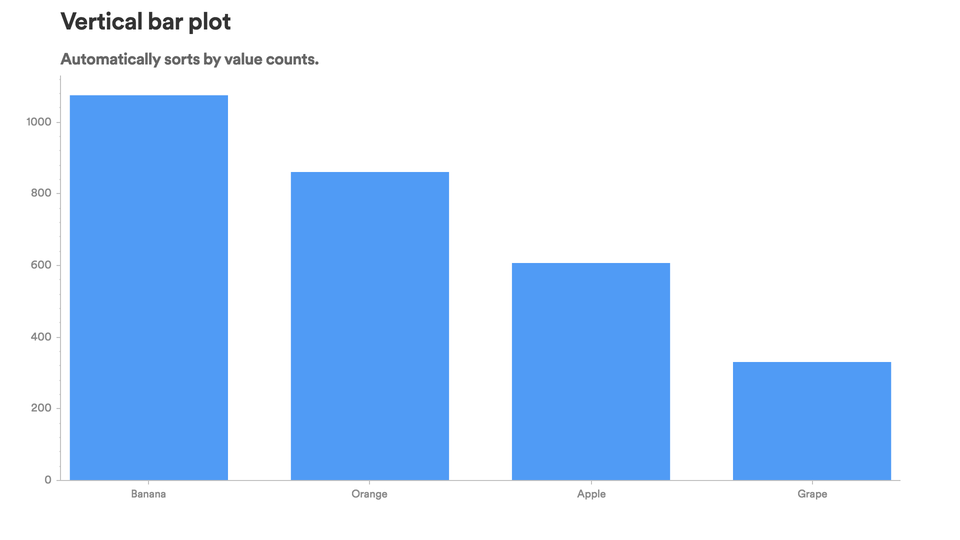


    ch = chartify.Chart(blank_labels=True, x_axis_type='categorical')
    ch.set_title("Vertical bar plot - Label sort")
    ch.set_subtitle("Set `categorical_order_by` to sort by labels")
    ch.plot.bar(quantity_by_fruit, 'fruit', 'quantity', categorical_order_by='labels',
                categorical_order_ascending=True)
    ch.show('png')



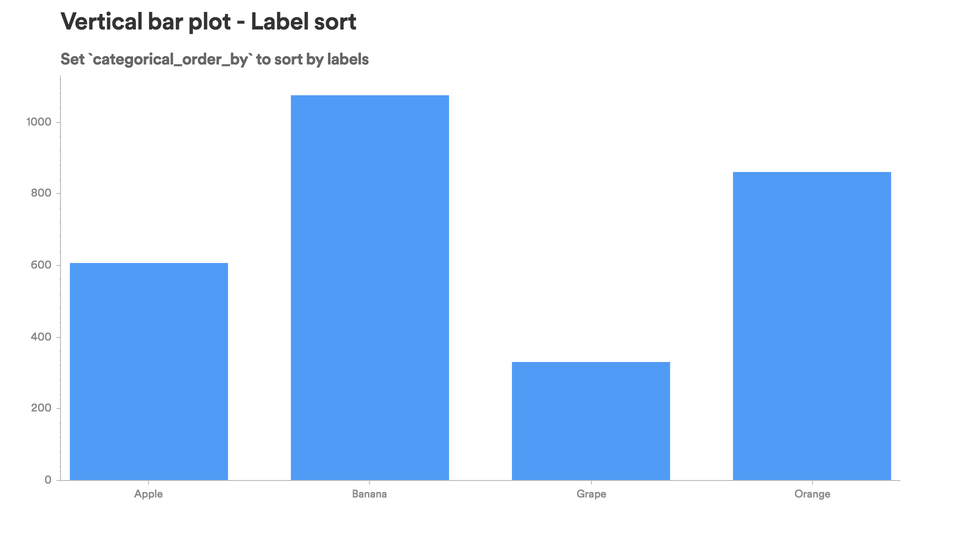


    ch = chartify.Chart(blank_labels=True, y_axis_type='categorical')
    ch.set_title("Horizontal bar plot")
    ch.set_subtitle("Horizontal with color grouping")
    ch.plot.bar(quantity_by_fruit, 'fruit', 'quantity', 'fruit')
    ch.show('png')



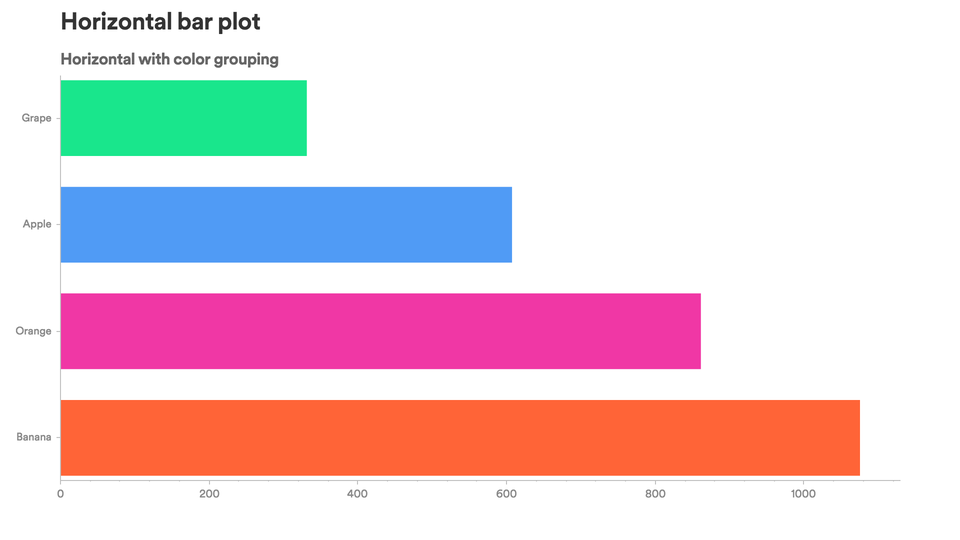


    ch = chartify.Chart(x_axis_type='categorical', blank_labels=True)
    ch.set_title("Vertical bar plot with labels")
    ch.set_subtitle("Hidden y-axis")
    ch.plot.bar(quantity_by_fruit, 'fruit', 'quantity', color_column='fruit')
    ch.style.color_palette.reset_palette_order()
    ch.plot.text(quantity_by_fruit, 'fruit', 'quantity', 'quantity', color_column='fruit')
    ch.axes.hide_yaxis()
    ch.show('png')



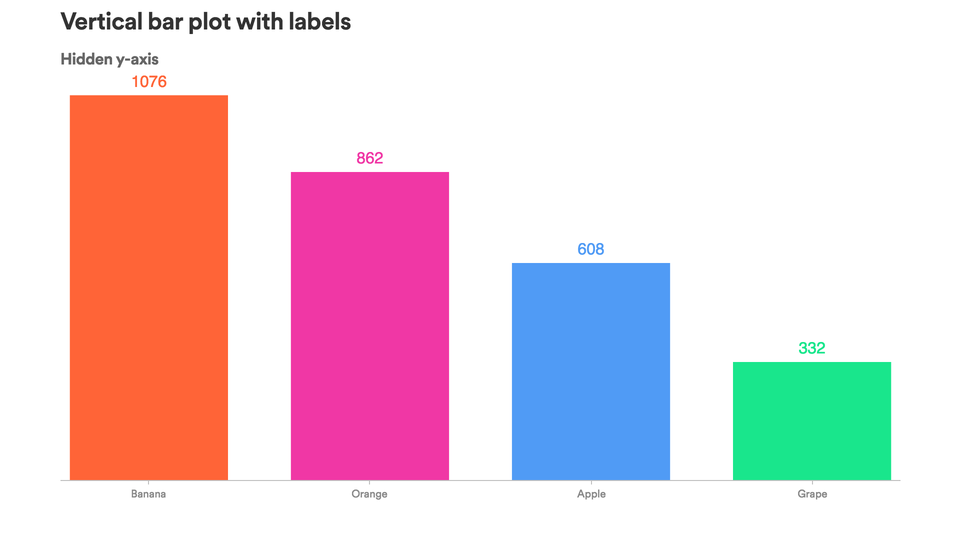

In [8]:
print(chartify.examples.plot_bar.__doc__)
chartify.examples.plot_bar()

## Bar (grouped)


    Grouped bar example.

    ch.plot.bar() docstring:
    Bar chart.

        Note:
            To change the orientation set x_axis_type or y_axis_type
            argument of the Chart object.

        Arguments:
            data_frame (pandas.DataFrame): Data source for the plot.
            categorical_columns (str or list): Column name to plot on the categorical axis.
            numeric_column (str): Column name to plot on the numerical axis.
            color_column (str, optional): Column name to group by on the color dimension.
            color_order (list, optional): List of values within the 'color_column'
                for specific color sort.
            categorical_order_by (str or array-like, optional):
                Dimension for ordering the categorical axis. Default 'values'.
                - 'values': Order categorical axis by the numerical axis values. Default.
                - 'labels': Order categorical axis by the categorical labels.
                - ar

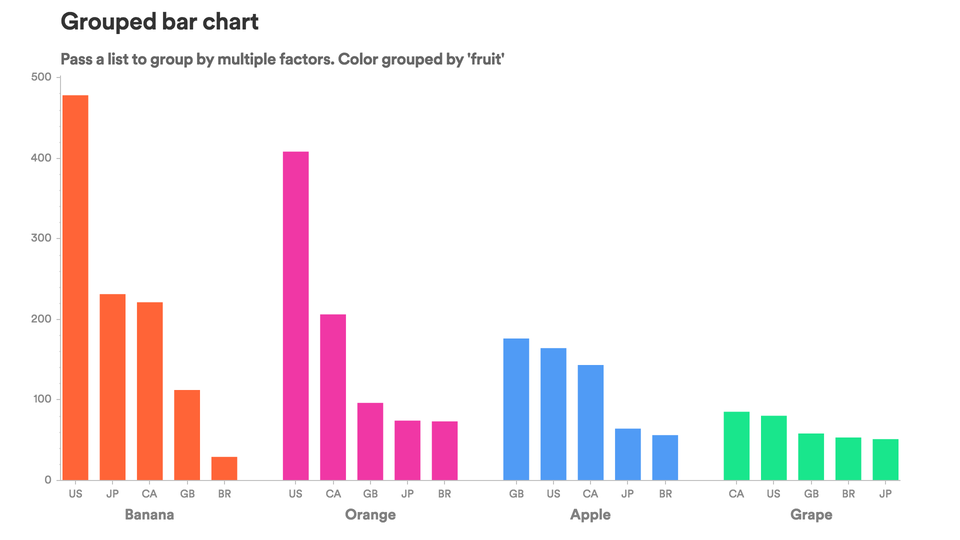


    ch = chartify.Chart(blank_labels=True, x_axis_type='categorical')
    ch.set_title("Grouped bar chart - Color groupings")
    ch.set_subtitle("Change color independent of the axis factors. Color grouped by 'country'")
    ch.plot.bar(quantity_by_fruit_and_country, ['fruit', 'country'], 'quantity', 'country')
    ch.show('png')



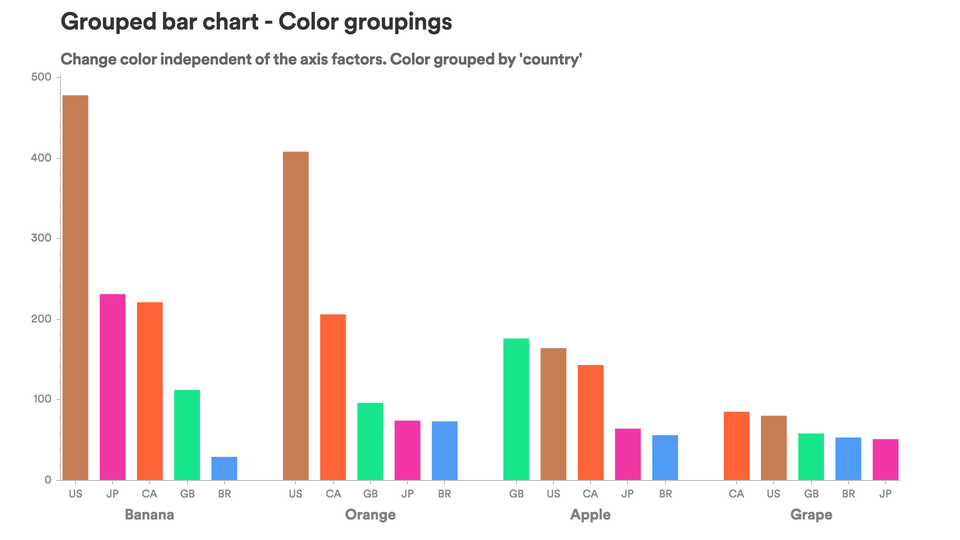


    ch = chartify.Chart(blank_labels=True, x_axis_type='categorical')
    ch.set_title("Grouped bar chart - Group hierarchy order")
    ch.set_subtitle("Change chage order of 'categorical_column' list to switch grouping hierarchy.")
    ch.plot.bar(quantity_by_fruit_and_country, ['country', 'fruit'], 'quantity', 'country')
    ch.show('png')



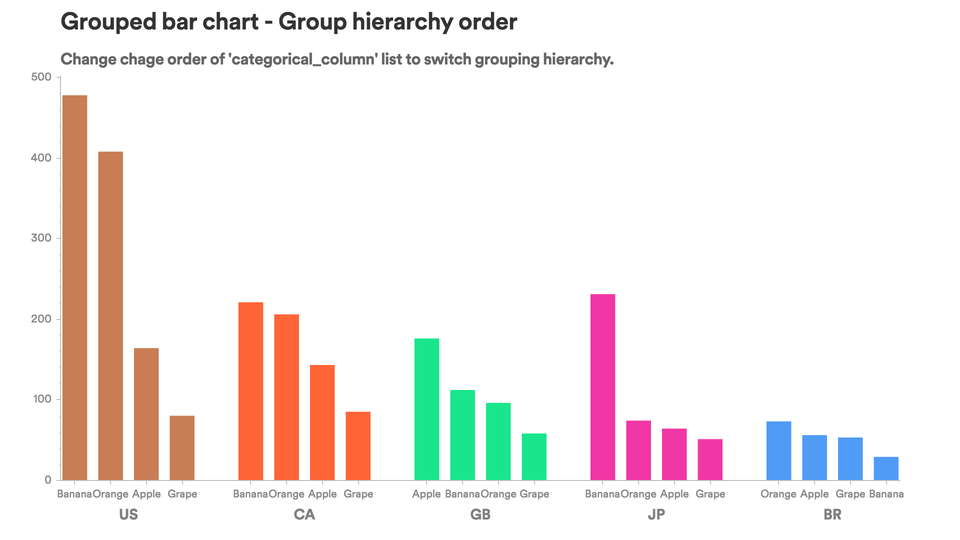


    ch = chartify.Chart(blank_labels=True, x_axis_type='categorical')
    ch.set_title("Grouped bar chart - Factor order")
    ch.set_subtitle("Change categorical order with 'categorical_order_by'.")
    ch.plot.bar(quantity_by_fruit_and_country, ['country', 'fruit'], 'quantity', 'country', categorical_order_by='labels', categorical_order_ascending=True)
    ch.show('png')



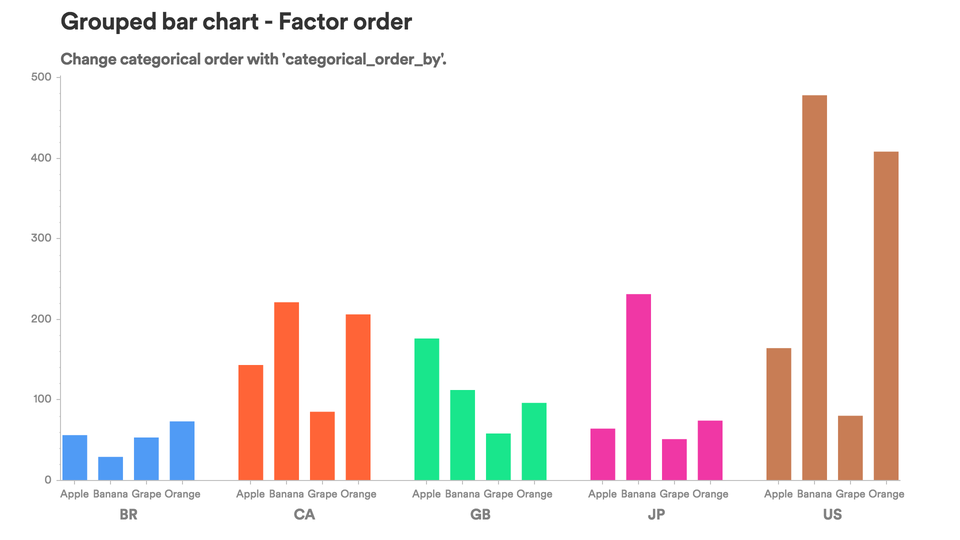

In [9]:
print(chartify.examples.plot_bar_grouped.__doc__)
chartify.examples.plot_bar_grouped()

# Interval

Interval.

        Arguments:
            data_frame (pandas.DataFrame): Data source for the plot.
            categorical_columns (str or list): Column name to plot on the categorical axis.
            lower_bound_column (str): Column name to plot on the numerical axis for the lower bound.
            upper_bound_column (str): Column name to plot on the numerical axis for the upper bound.
            middle_column (str, optional): Column name to plot on the
                numerical axis for the middle tick.
            categorical_order_by (str or array-like, optional):
                Dimension for ordering the categorical axis. Default 'values'.
                - 'values': Order categorical axis by the numerical axis values. Default.
                - 'labels': Order categorical axis by the categorical labels.
                - array-like object (list, tuple, np.array): New labels
                    to conform the categorical axis to.
            categorical_order_ascending (bool,

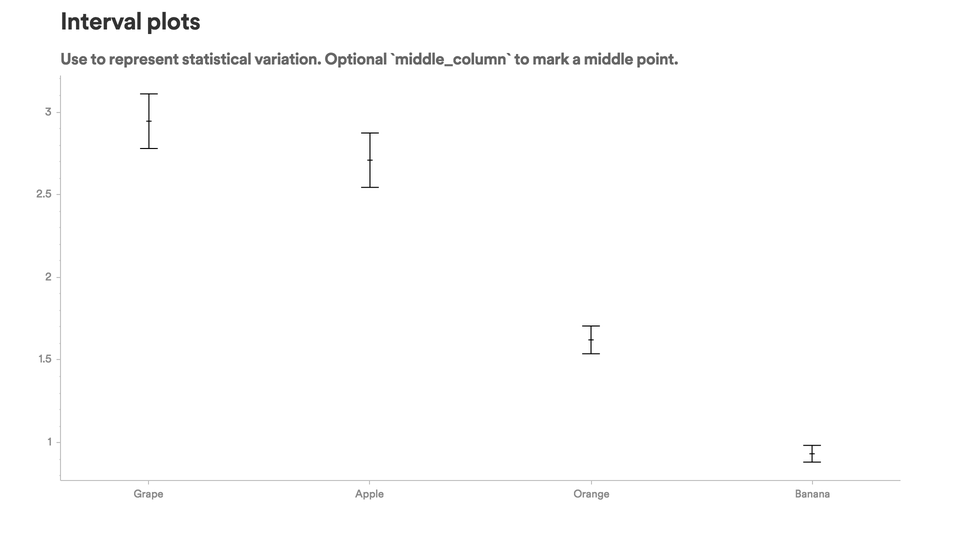


    ch = chartify.Chart(blank_labels=True, x_axis_type='categorical')
    ch.set_title("Combined interval plot & bar plot")
    ch.plot.bar(avg_price_with_interval, 'fruit', 'mean')
    ch.plot.interval(avg_price_with_interval, 'fruit', lower_bound_column='lower_ci',
                     upper_bound_column='upper_ci')
    ch.show('png')



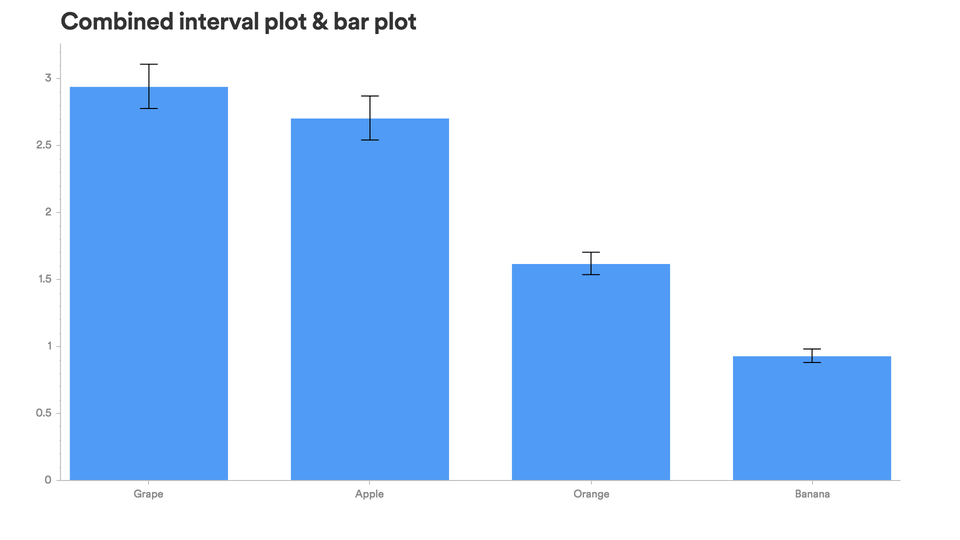

In [10]:
print(chartify.examples.plot_interval.__doc__)
chartify.examples.plot_interval()

## Lollipop

Lollipop chart.

        Note:
            To change the orientation set x_axis_type or y_axis_type
            argument of the Chart object.

        Arguments:
            data_frame (pandas.DataFrame): Data source for the plot.
            categorical_columns (str or list): Column name to plot on the categorical axis.
            numeric_column (str): Column name to plot on the numerical axis.
            color_column (str, optional): Column name to group by on the color dimension.
            color_order (list, optional):
                List of values within the 'color_column' for specific color sort.
            categorical_order_by (str or array-like, optional):
                Dimension for ordering the categorical axis. Default 'values'.
                - 'values': Order categorical axis by the numerical axis values.
                - 'labels': Order categorical axis by the categorical labels.
                - array-like object (list, tuple, np.array): New labels
            

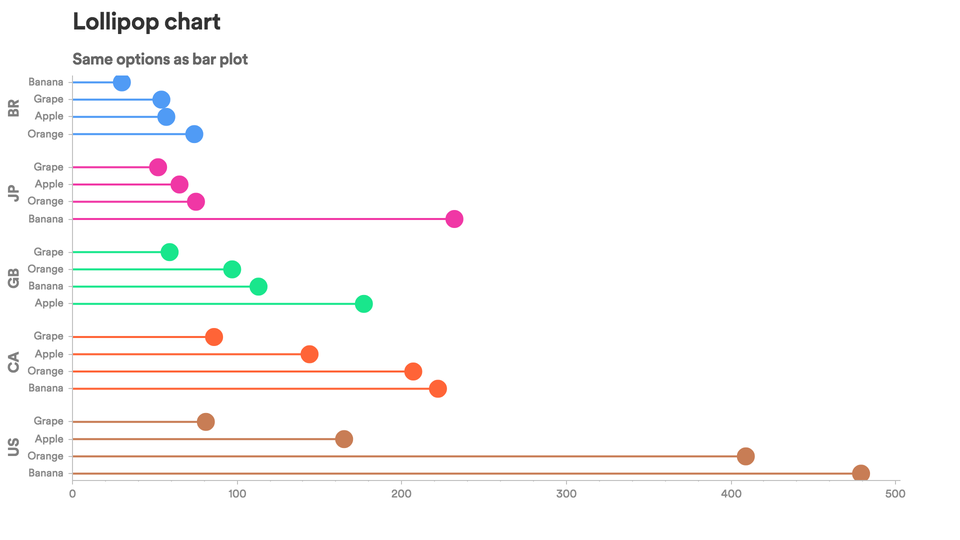

In [11]:
print(chartify.examples.plot_lollipop.__doc__)
chartify.examples.plot_lollipop()

## Bar (Stacked)

Plot stacked bar chart.

        Note:
            - To change the orientation set x_axis_type or y_axis_type
            argument of the Chart object.
            - Stacked numeric values must be all positive or all negative.
            To plot both positive and negative values on the same chart call this
            method twice. Once for the positive values and once for the negative values.

        Arguments:
            data_frame (pandas.DataFrame): Data source for the plot.
            categorical_columns (str or list): Column name to plot on the categorical axis.
            numeric_column (str): Column name to plot on the numerical axis.
            stack_column (str): Column name to group by on the stack dimension.
            normalize (bool, optional): Normalize numeric dimension for
                100% stacked bars. Default False.
            stack_order (list, optional): List of values within the 'stack_column'
                dimension for specific stack sort.
        

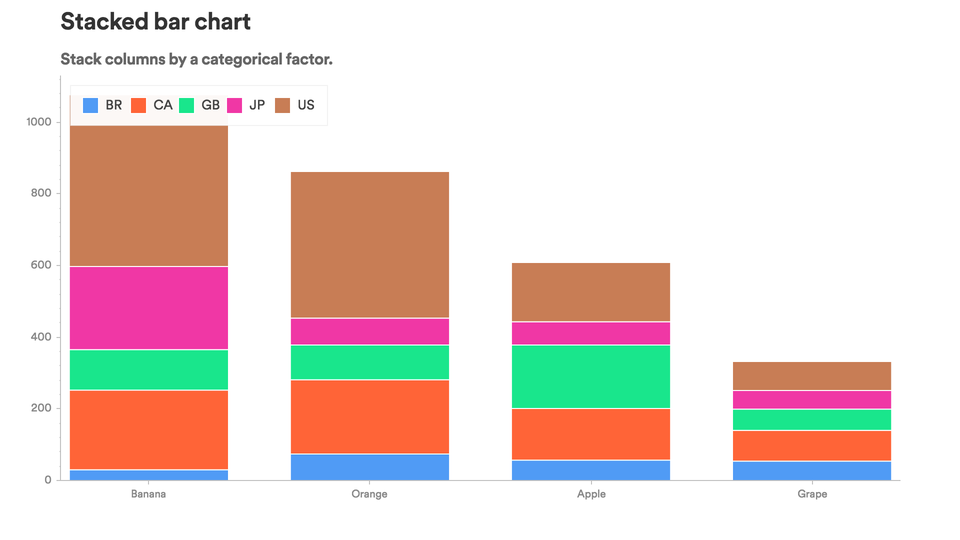


    (chartify.Chart(blank_labels=True, x_axis_type='categorical')
     .set_title("Grouped bar chart - Normalized")
     .set_subtitle("Set the 'normalize' parameter for 100% bars.")
     .plot.bar_stacked(quantity_by_fruit_and_country, ['fruit'], 'quantity', 'country', True)
     .show('png')
    )



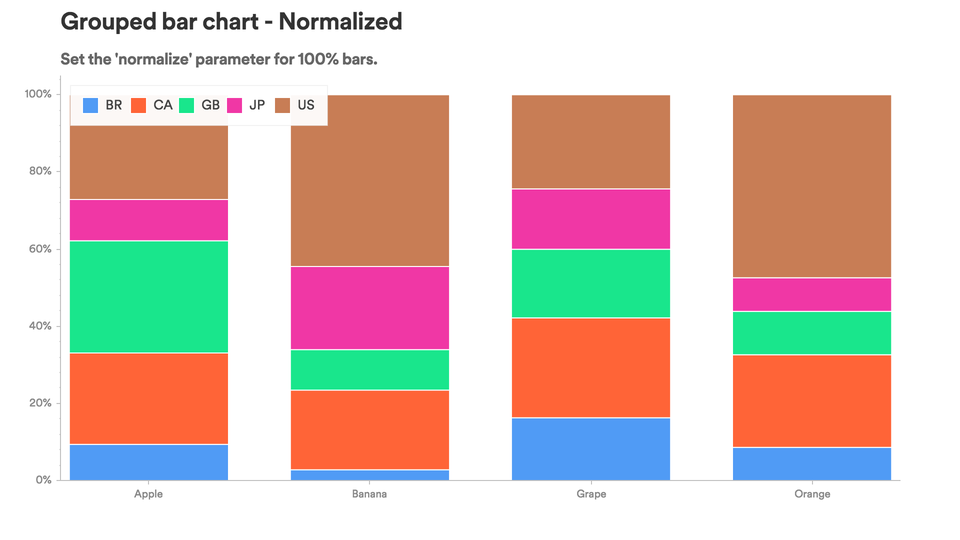


    # Get the ordered list of quanity by country to order the stacks.
    country_order = (quantity_by_fruit_and_country.groupby('country')['quantity'].sum()
                     .sort_values(ascending=False).index
                    )
    (chartify.Chart(blank_labels=True, x_axis_type='categorical')
     .set_title("Grouped bar chart - Ordered stack")
     .set_subtitle("Change the order of the stack with `stack_order`.")
     .plot.bar_stacked(quantity_by_fruit_and_country, ['fruit'], 'quantity', 'country', True, stack_order=country_order)
     .show('png')
    )



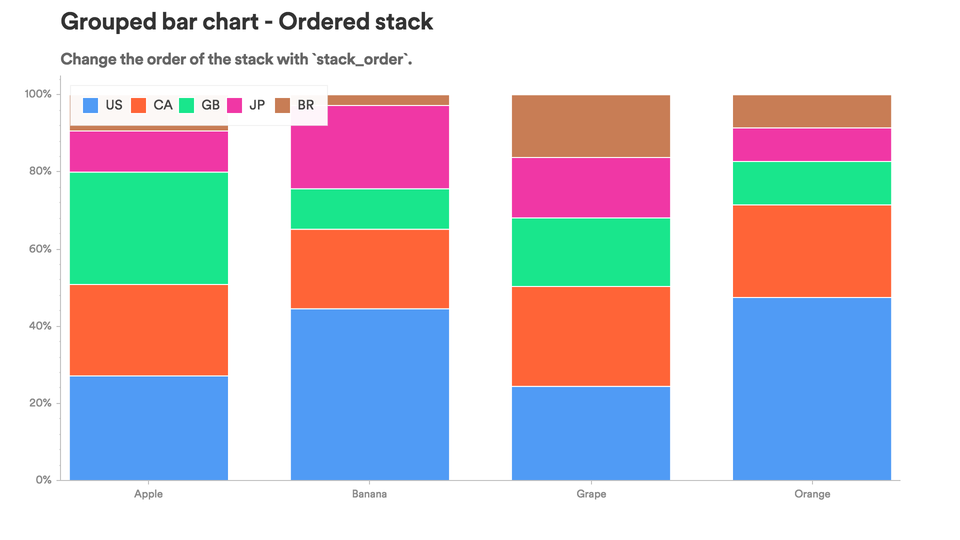

In [12]:
print(chartify.examples.plot_bar_stacked.__doc__)
chartify.examples.plot_bar_stacked()

# Parallel coordinate plot

Parallel coordinate plot.

        Arguments:
            data_frame (pandas.DataFrame): Data source for the plot.
            categorical_columns (str or list): Column name to plot on the categorical axis.
            numeric_column (str): Column name to plot on the numerical axis.
            color_column (str, optional): Column name to group by on the color dimension.
            color_order (list, optional): List of values within the 'color_column'
                for specific color sort.
            categorical_order_by (str or array-like, optional):
                Dimension for ordering the categorical axis. Default 'values'.
                - 'values': Order categorical axis by the numerical axis values.
                - 'labels': Order categorical axis by the categorical labels.
                - array-like object (list, tuple, np.array): New labels
                    to conform the categorical axis to.
            categorical_order_ascending (bool, optional):
              

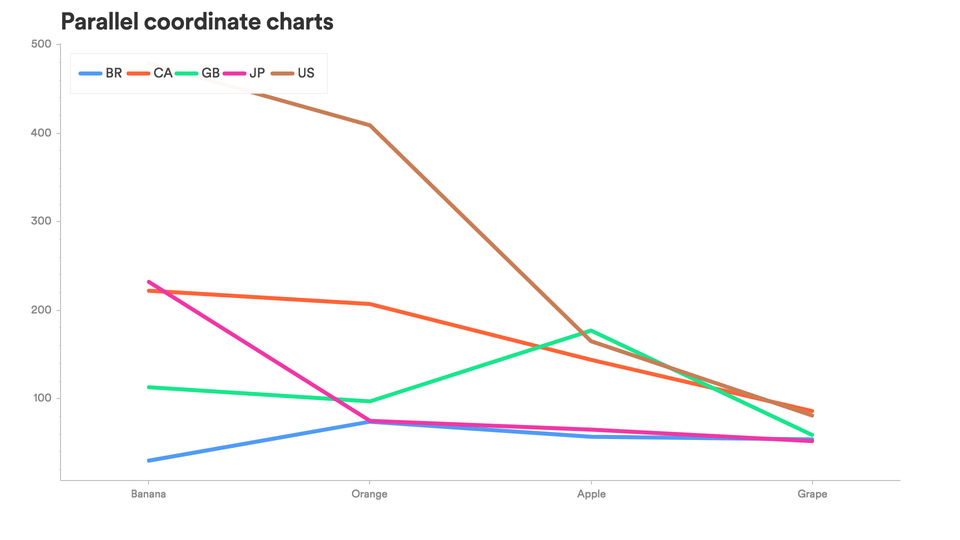

In [13]:
print(chartify.examples.plot_parallel.__doc__)
chartify.examples.plot_parallel()

# Both categorical axes

## Heatmap

Docstring

        Arguments:
            data_frame (pandas.DataFrame): Data source for the plot.
            x_column (str): Column name to plot on the x axis.
            y_column (str): Column name to plot on the y axis.
            color_column (str): Column name of numerical type to plot on the color dimension.
            labels (bool, optional): Display values within each cell. Default: True.
            

    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    average_price_by_fruit_and_country = (
        data.groupby(['fruit', 'country'])['total_price'].mean()
        .reset_index()
    )
    

    # Plot the data
    (chartify.Chart(blank_labels=True, x_axis_type='categorical', y_axis_type='categorical')
     .plot.heatmap(average_price_by_fruit_and_country, 'fruit', 'country', 'total_price')
     .axes.set_xaxis_label('Fruit')
     .axes.set_yaxis_label('Country')
     .set_title('Heat

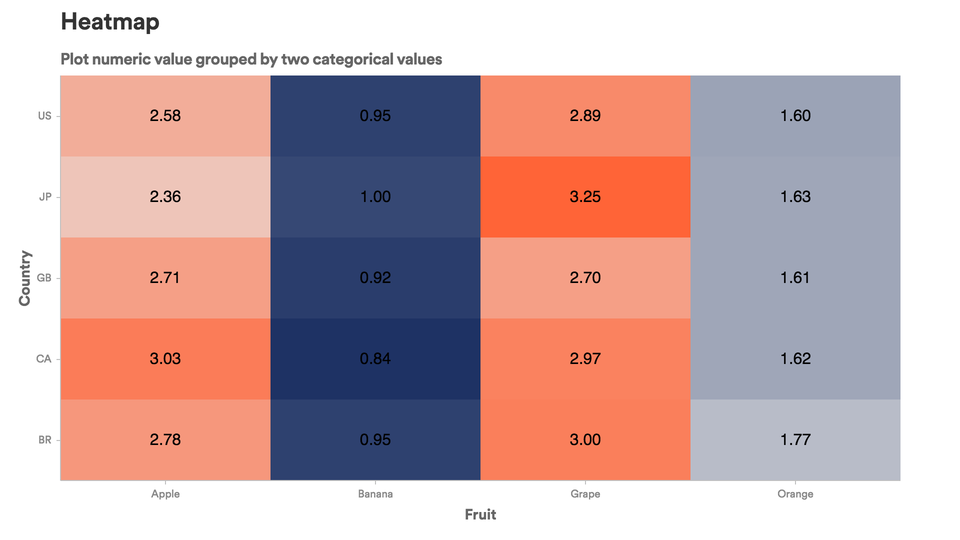

In [14]:
print(chartify.examples.plot_heatmap.__doc__)
chartify.examples.plot_heatmap()

# Single density axis

Kernel Density Estimate Plot.

        Arguments:
            data_frame (pandas.DataFrame): Data source for the plot.
            values_column (str): Column of numeric values.
            color_column (str, optional): Column name to group by on the color dimension.
            color_order (list, optional): List of values within the 'color_column'
                for specific sorting of the colors.
        


    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    print(data.head())
    
        date country   fruit  unit_price  quantity  total_price
0 2017-10-21      US  Banana    0.303711         4     1.214846
1 2017-05-30      JP  Banana    0.254109         4     1.016436
2 2017-05-21      CA  Banana    0.268635         4     1.074539
3 2017-09-18      BR   Grape    2.215277         2     4.430554
4 2017-12-08      US  Banana    0.308337         5     1.541687

    # Plot the data
    ch = cha

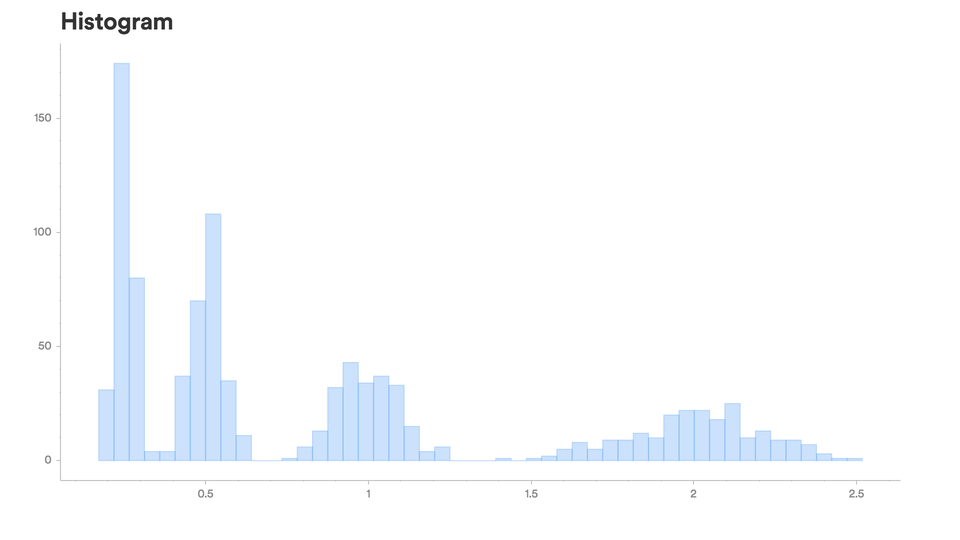


    ch = chartify.Chart(blank_labels=True, x_axis_type='density')
    ch.set_title("Horizontal histogram with grouping")
    ch.set_subtitle("")
    ch.plot.histogram(data, 'unit_price', 'fruit')
    ch.show('png')



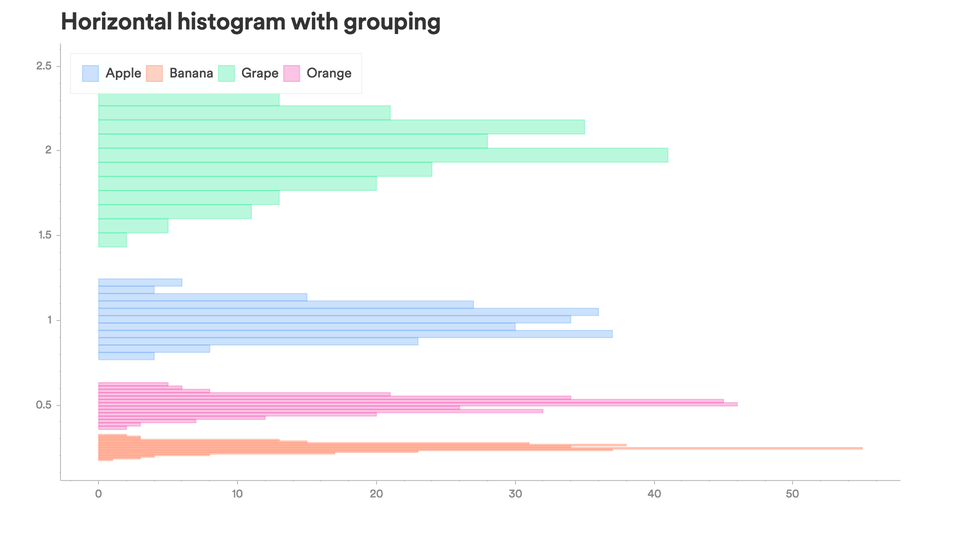

In [15]:
print(chartify.examples.plot_histogram.__doc__)
chartify.examples.plot_histogram()


    KDE example
    


    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    print(data.head())
    
        date country   fruit  unit_price  quantity  total_price
0 2017-10-21      US  Banana    0.303711         4     1.214846
1 2017-05-30      JP  Banana    0.254109         4     1.016436
2 2017-05-21      CA  Banana    0.268635         4     1.074539
3 2017-09-18      BR   Grape    2.215277         2     4.430554
4 2017-12-08      US  Banana    0.308337         5     1.541687
    
    # Plot the data
    ch = chartify.Chart(blank_labels=True, y_axis_type='density')
    ch.set_title("KDE plot")
    ch.plot.kde(data, 'unit_price', 'fruit')
    ch.show('png')



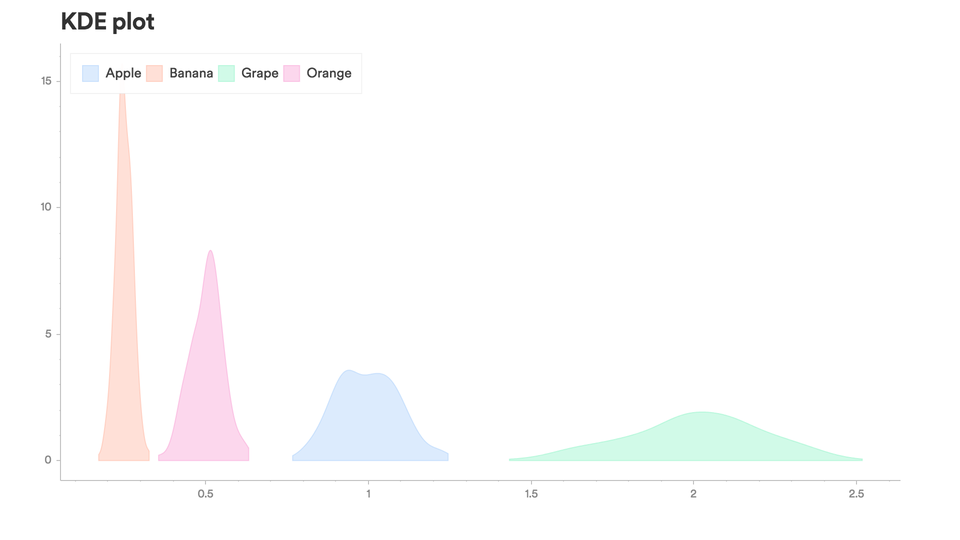

    
    # Plot the data
    ch = chartify.Chart(blank_labels=True, y_axis_type='density')
    ch.set_title("KDE plot + Histogram")
    ch.plot.kde(data, 'unit_price', 'fruit')
    ch.style.color_palette.reset_palette_order()
    ch.plot.histogram(data, 'unit_price', 'fruit', method='density')
    ch.show('png')



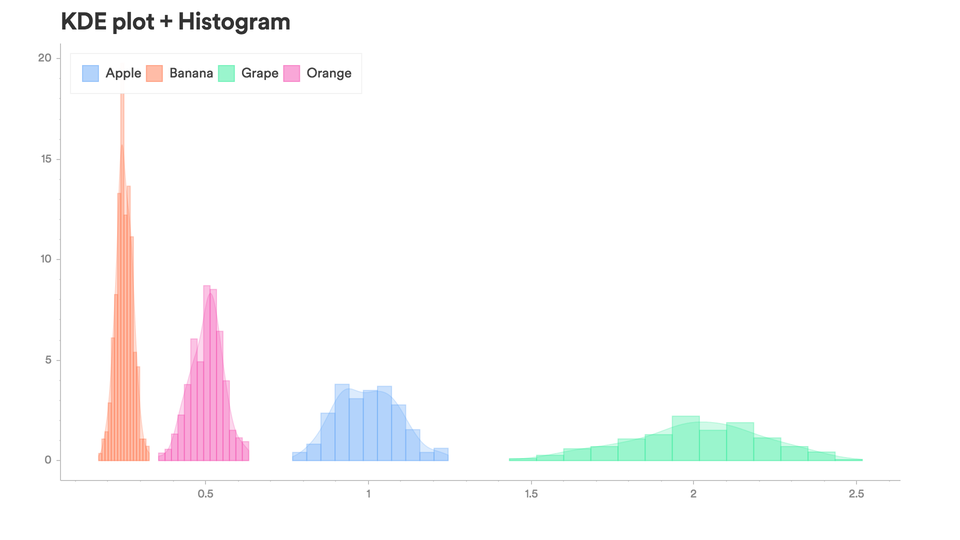

In [16]:
print(chartify.examples.plot_kde.__doc__)
chartify.examples.plot_kde()

# Chart aesthetics

## Labels


    Chart label examples
    

    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    apple_prices = (data[data['fruit'] == 'Apple']
                    .groupby(['quantity'])['unit_price'].mean()
                    .reset_index())
    # Plot the data with method chaining
    (chartify.Chart(blank_labels=True)
     .plot.scatter(apple_prices, 'quantity', 'unit_price')
     .set_title("Quantity decreases as price increases.  <--  Use title for takeaway.")
     .set_subtitle("Quantity vs. Price. <-- Use subtitle for data description.")
     .set_source_label("Source: lexicon.spotify.net/abc")
     .axes.set_xaxis_label("Quantity per sale (Apples)")
     .axes.set_yaxis_label("Price ($)")
     .show('png')
    )



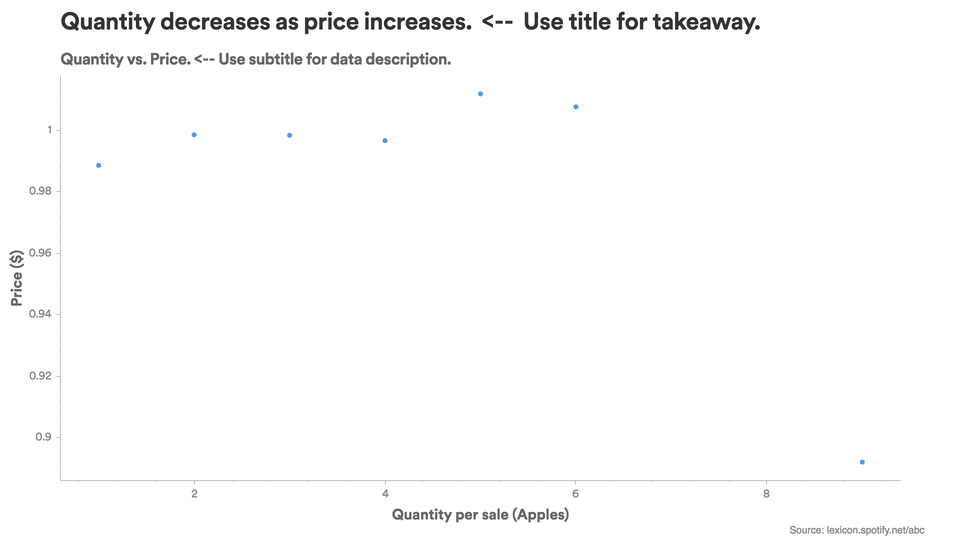

In [17]:
print(chartify.examples.chart_labels.__doc__)
chartify.examples.chart_labels()

# Axis type



    Axis type examples
    

    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    # Plot the data
    (chartify.Chart(blank_labels=True, x_axis_type='log')
     .plot.scatter(data, 'total_price', 'quantity')
     .set_subtitle("Set axis type for auto handling of categorical, datetime, linear, or log values.")
     .set_title("Axis Type")
     .show('png')
    )



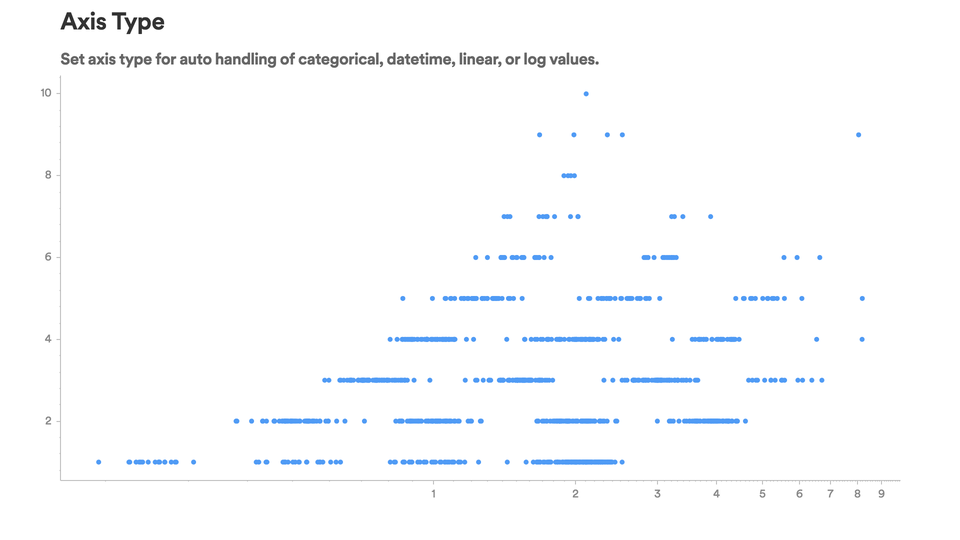

In [18]:
print(chartify.examples.axes_axis_type.__doc__)
chartify.examples.axes_axis_type()

# Tick label format


    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = chartify.examples.example_data()
    data['%_sales'] = data['quantity'] / data['quantity'].sum()

    # Plot the data
    (chartify.Chart(blank_labels=True)
     .plot.scatter(data, '%_sales', 'unit_price')
     .axes.set_yaxis_tick_format("$0.00")
     .axes.set_xaxis_tick_format("0.00%")
     .set_subtitle("Format ticks on either axis to set units or precision")
     .set_title("Axis tick format")
     .show('png')
    )



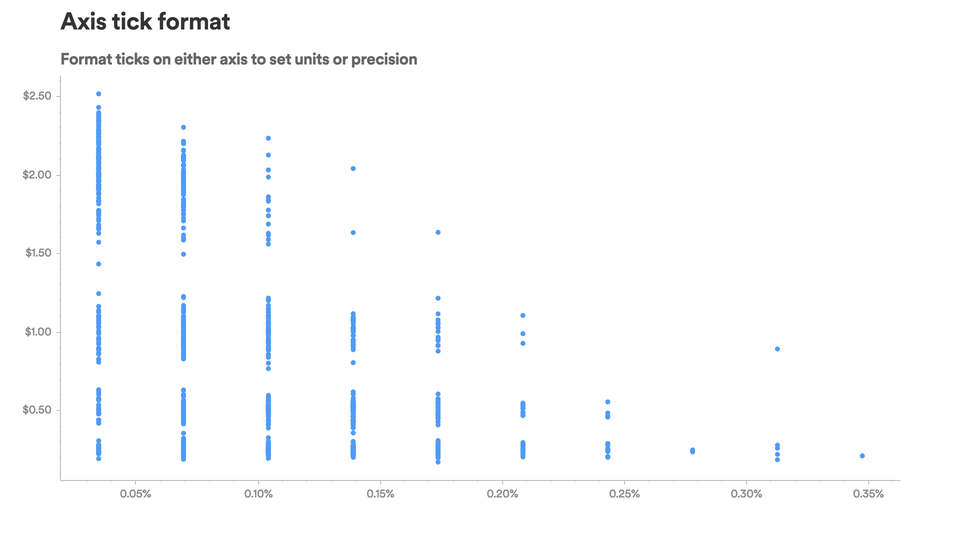

In [19]:
chartify.examples.axes_axis_tick_format()

# Axes Ranges

# Callouts

## Line callout


    Line example
    

    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    # Plot the data
    (chartify.Chart(blank_labels=True)
     .plot.scatter(data, 'unit_price', 'total_price')
     .callout.line(2) # Callout horizontal line
     .callout.line(1, 'height') # Callout vertical line
     .set_title('Line callout')
     .set_subtitle("Callout lines on either axis")
     .show('png')
    )



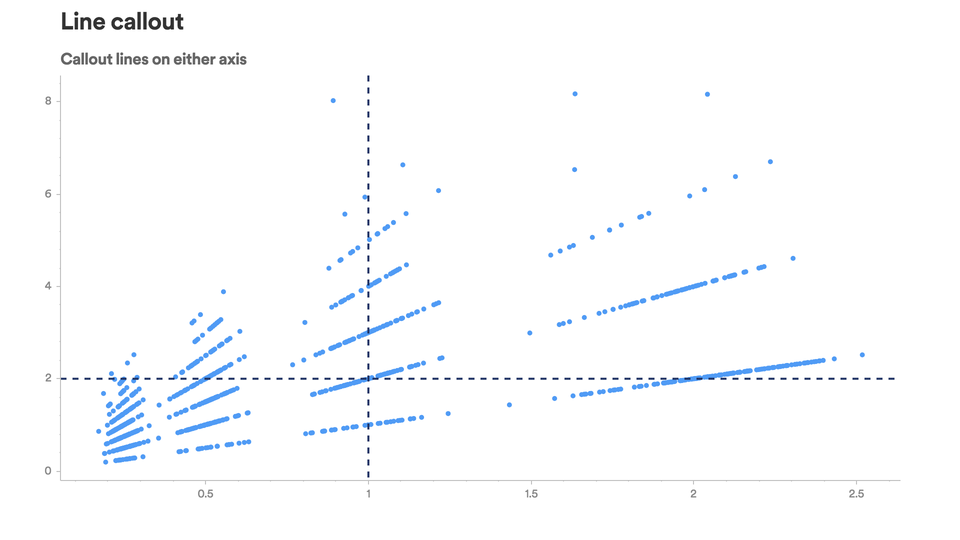

In [20]:
print(chartify.examples.callout_line.__doc__)
chartify.examples.callout_line()

## Box callout

Add box callout to the chart.

        Args:
            top (numeric, optional): Top edge of the box.
            bottom (numeric, optional): Bottom edge of the box.
            left (numeric, optional): Left edge of the box.
            right (numeric, optional): Right edge of the box.
            alpha (float, optional): 0.2
            color (color, optional): Color of box. Default: 'red'

        Note:
            The box will extend to the edge if the corresponding position
            argument is omitted.

        Returns:
            Current chart object
        

    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    # Plot the data
    (chartify.Chart(blank_labels=True)
     .plot.scatter(data, 'total_price', 'unit_price')
     .callout.box(top=1, bottom=-1, color='red')
     .callout.box(top=2, left=4, color='blue')
     .callout.box(bottom=2, right=3, color='green')
     .set_title("Sh

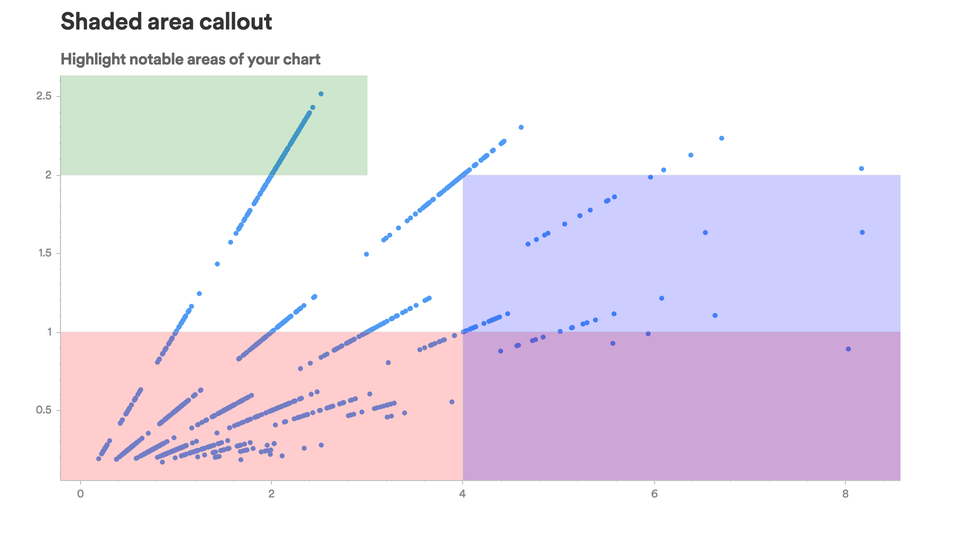

In [21]:
print(chartify.examples.callout_box.__doc__)
chartify.examples.callout_box()

## Text callout

Add text callout to the chart.

        Note:
            Use `
` within text for newlines.
        Args:
            x (numeric): x location of the text.
            y (numeric, optional): y location of the text.
            text_color: Text color.
            text_align (str: 'left', 'right', 'center'): Text alignment.
            angle (int, 0 to 360): Angle in degrees from horizontal. Default: 0

        Returns:
            Current chart object
        

    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    # Plot the data
    ch = chartify.Chart(blank_labels=True)
    ch.plot.scatter(data, 'unit_price', 'total_price')
    ch.callout.text("Description of what is\ngoing on in this chart!", 0, 6)
    ch.set_title("Text callout")
    ch.set_subtitle("Add narrative to your chart.")
    ch.show('png')



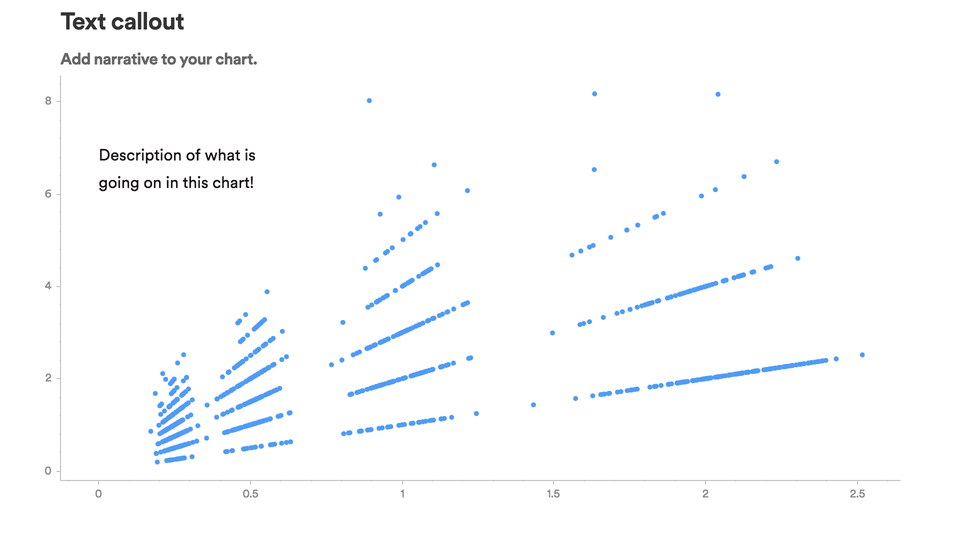

In [22]:
print(chartify.examples.callout_text.__doc__)
chartify.examples.callout_text()

# Color Palettes

In [23]:
chartify.color_palettes

Color Palettes: 
'Spotify Palette'
'Midnight Orange Palette'
'Pair Palette'
'Colours that POP'
'Performance Palette'
'Blue-violet-orange-green Palette'
'Tech Companies'
'Midnight Orange Diverging'
'Spearmint + Pink Diverging'
'Klein Blue + Powder Green Diverging'
'Fuchsia + Factory Yellow Diverging'
'Aquamarine + Rogue Purple Diverging'
'Aubergine + Salmon Diverging'
'Aubergine + Orange Diverging'
'Royal + White Diverging'
'Midnight + Seafoam Green Diverging'
'Midnight + Lavender Diverging'
'Performance R-Y-G Diverging'
'Performance R-G Diverging'
'Performance Green Sequential'
'Performance Red Sequential'
'Greyscale Sequential'
'Blue Sequential'
'Violet Sequential'
'Orange Sequential'
'Green Sequential'
'Midnight Azure Sequential'
'Midnight Orange Sequential'
'All colors'

In [24]:
chartify.color_palettes.show()

## Categorical


    Color palette
    

    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = pd.DataFrame({'x': list(range(100))})
    data['y'] = data['x'] * np.random.normal(size=100)
    data['z'] = np.random.choice([2, 4, 5], size=100)
    data['country'] = np.random.choice(['US', 'GB', 'CA', 'JP', 'BR'], size=100)

    # Plot the data
    ch = chartify.Chart(blank_labels=True)
    ch.style.set_color_palette(palette_type='categorical')
    ch.plot.scatter(data, 'x', 'y', color_column='country')
    ch.set_title("Categorical color palette type")
    ch.set_subtitle("Default palette type. Use to differentiate categorical series.")
    ch.show('png')
    


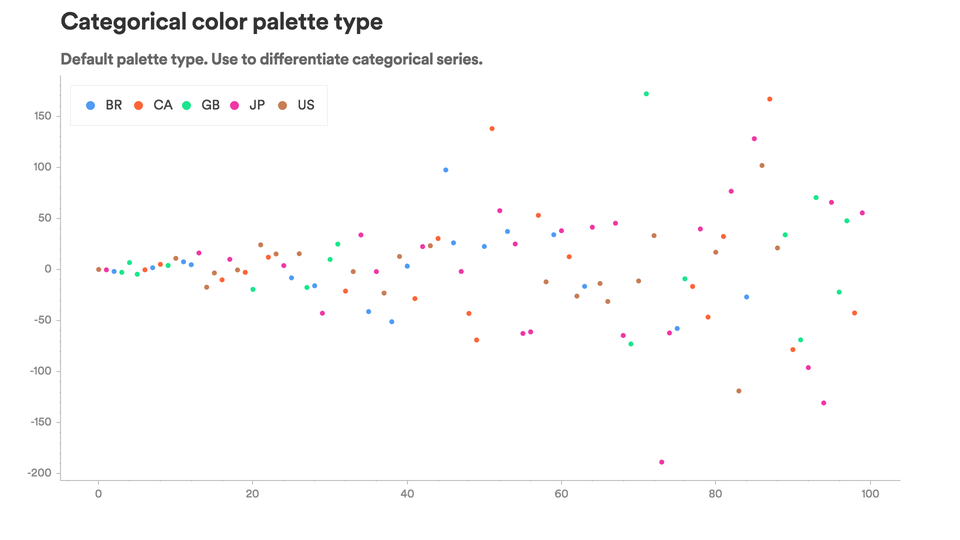


    # Plot the data
    ch = chartify.Chart(blank_labels=True)
    ch.style.set_color_palette(palette_type='categorical', palette='Pair Palette')
    ch.plot.scatter(data, 'x', 'y', color_column='country')
    ch.set_title("Pass 'palette' parameter to .set_color_palette() to change palette colors.")
    ch.set_subtitle("")
    ch.show('png')



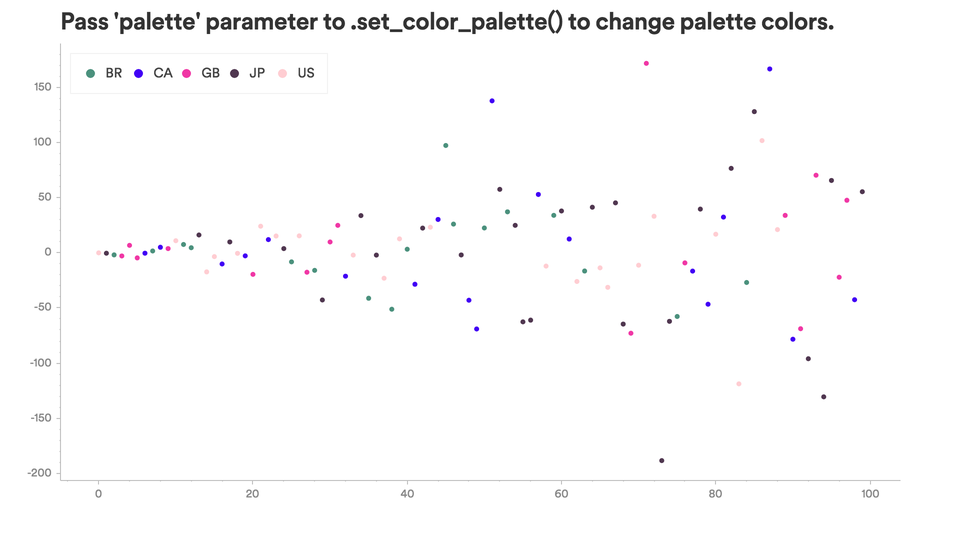

In [25]:
print(chartify.examples.style_color_palette_categorical.__doc__)
chartify.examples.style_color_palette_categorical()

# Accent


    Color palette
    

    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = pd.DataFrame({'x': list(range(100))})
    data['y'] = data['x'] * np.random.normal(size=100)
    data['z'] = np.random.choice([2, 4, 5], size=100)
    data['country'] = np.random.choice(['US', 'GB', 'CA', 'JP', 'BR'], size=100)

    # Plot the data
    ch = chartify.Chart(blank_labels=True)
    ch.style.set_color_palette('accent', accent_values=['US', 'CA'])
    ch.plot.scatter(data, 'x', 'y', size_column='z', color_column='country')
    ch.set_title("Accent color palette")
    ch.set_subtitle("Highlight specific color values or assign specific colors to values.")
    ch.show('png')



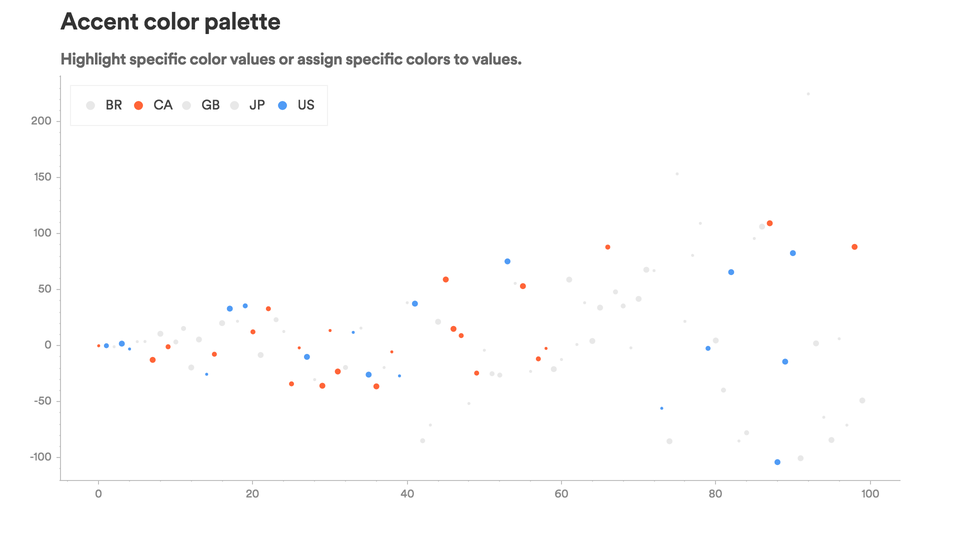

In [26]:
print(chartify.examples.style_color_palette_accent.__doc__)
chartify.examples.style_color_palette_accent()

# Sequential


    Color palette sequential
    

    import numpy as np
    import pandas as pd
    import chartify

    data = pd.DataFrame({'time': pd.date_range('2015-01-01', '2018-01-01')})
    n_days = len(data)
    data['1st'] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days)
    data['2nd'] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 200
    data['3rd'] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 500
    data['4th'] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 700
    data['5th'] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 800
    data['6th'] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 1000
    data = pd.melt(data, id_vars=['time'], value_vars=data.columns[1:], #TODO explain how to use melt
                   value_name='y', var_name=['grouping'])

    # Plot the data
    ch = chartify.Chart(blank_labels=True, x_axis_type='dateti

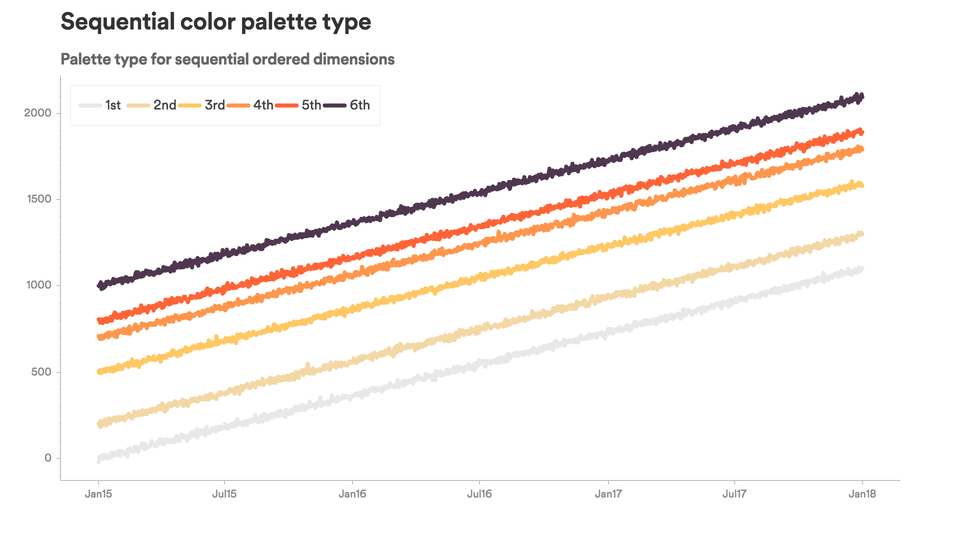

In [27]:
print(chartify.examples.style_color_palette_sequential.__doc__)
chartify.examples.style_color_palette_sequential()

# Diverging


    Color palette sequential
    

    import numpy as np
    import pandas as pd
    import chartify

    data = pd.DataFrame({'time': pd.date_range('2015-01-01', '2018-01-01')})
    n_days = len(data)
    data['Very Unlikely'] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days)
    data['Unlikely'] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 200
    data['Neutral'] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 500
    data['Likely'] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 700
    data['Very Likely'] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 800
    data = pd.melt(data, id_vars=['time'], value_vars=data.columns[1:], #TODO explain how to use melt
                   value_name='y', var_name=['grouping'])

    # Plot the data

    ch = chartify.Chart(blank_labels=True, x_axis_type='datetime')
    ch.style.set_color_palette(palette_type='diverging')
 

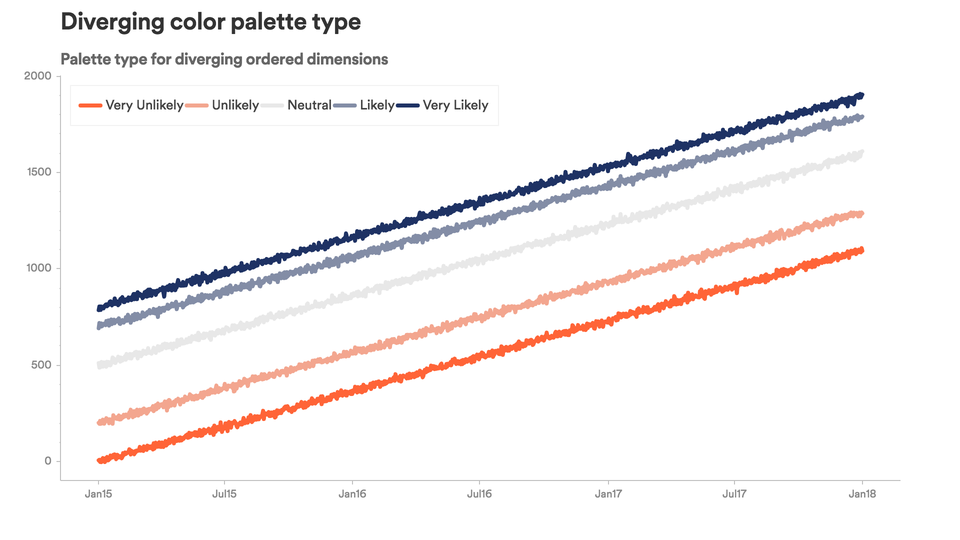

In [28]:
print(chartify.examples.style_color_palette_diverging.__doc__)
chartify.examples.style_color_palette_diverging()

# Layouts


    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = pd.DataFrame({'Price': list(range(100))})
    data['Demand'] = 100 + -.5 * data['Price'] + np.random.normal(size=100)

    layouts = ['slide_100%', 'slide_75%', 'slide_50%', 'slide_25%']

    def display_layout(layout):
        (chartify.Chart(layout=layout) # Assign the layout when instantiating the chart.
         .plot.scatter(data, 'Price', 'Demand')
         .set_title("Slide layout: '{}'".format(layout))
         .set_subtitle("Demand vs. Price.")
         .set_source_label("Source: lexicon.spotify.net/abc")
         .axes.set_xaxis_label("Demand (# Users)")
         .axes.set_yaxis_label("Price ($)")
         .show('png')
        )

    [display_layout(layout) for layout in layouts]



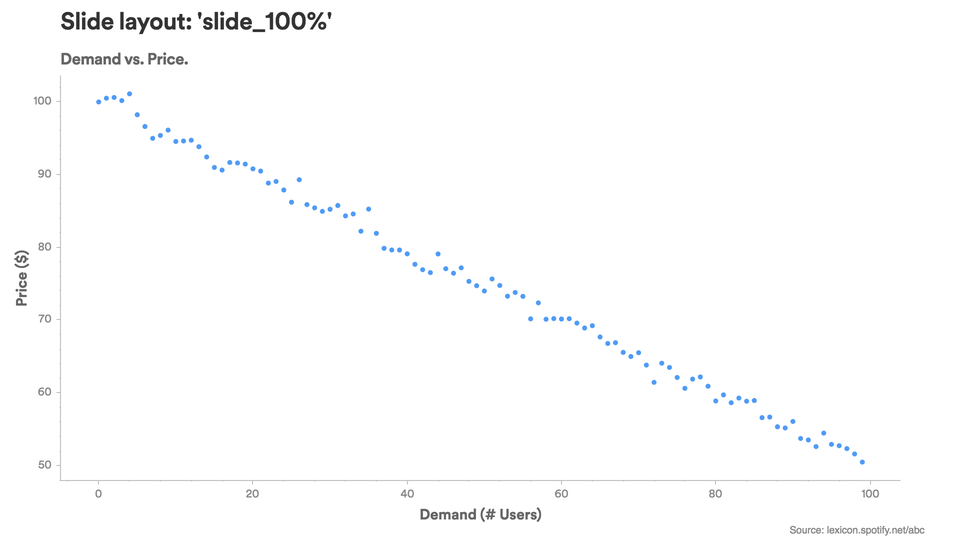

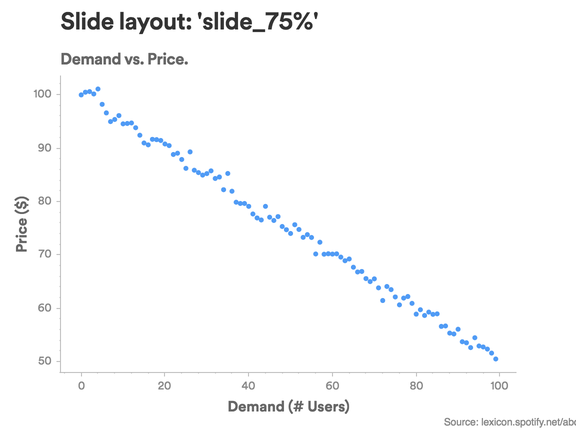

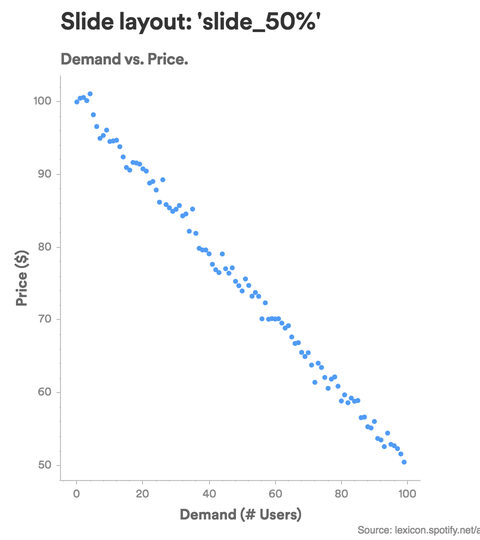

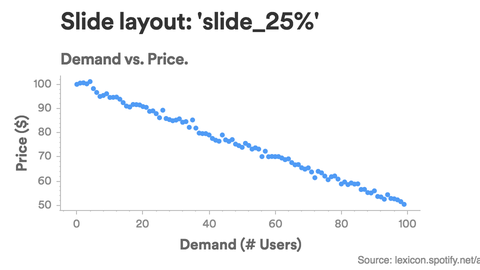

In [29]:
chartify.examples.chart_layouts()

Show the chart.

        Arguments:
            format (str):
                - 'html': Output chart as HTML.
                    Renders faster and allows for interactivity.
                    Charts saved as HTML in a Jupyter notebook WILL NOT display
                    on Github.
                    Logos will not display on HTML charts.
                    Recommended when drafting plots.

                - 'png': Output chart as PNG.
                    Easy to paste into google slides.
                    Recommended when the plot is in a finished state.
                    Will render logos.
                

    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = pd.DataFrame({'x': list(range(100))})
    data['y'] = data['x'] * np.random.normal(size=100)
    data['z'] = np.random.choice([2, 4, 5], size=100)
    data['country'] = np.random.choice(['US', 'GB', 'CA', 'JP', 'BR'], size=100)

    # Plot the data
    ch = chartify.

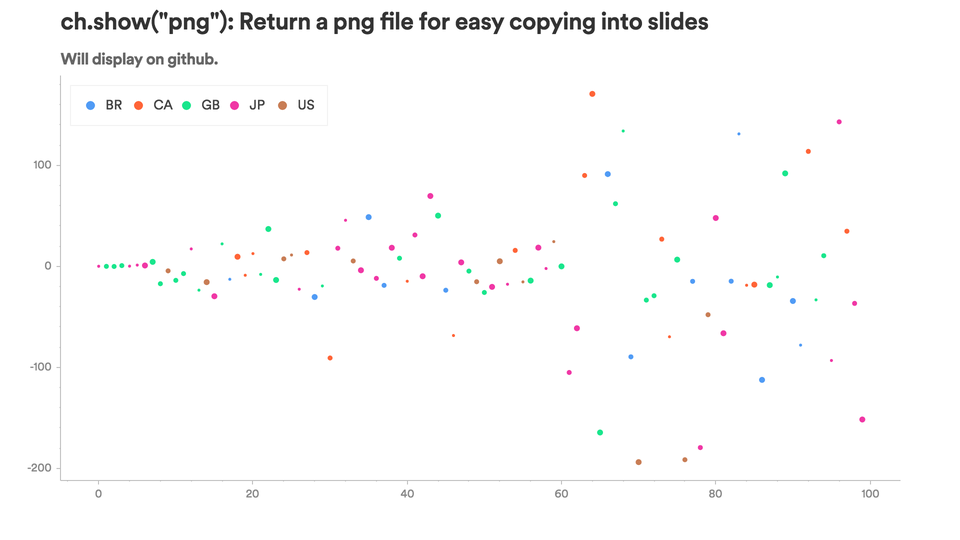

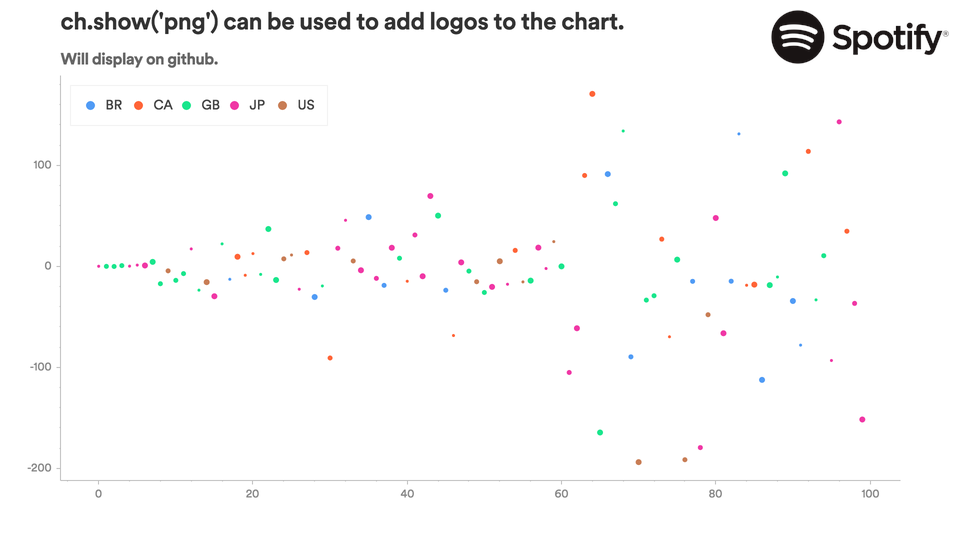

In [30]:
print(chartify.examples.chart_show.__doc__)
chartify.examples.chart_show()